# Module 5, Assignment 1, Question 2: Neural Networks on Tabular Data

In this part, you’ll work with MNIST, a classic dataset of handwritten digits (0–9). Each example is a small grayscale image (28×28 pixels) and a label (which digit it is). We’ll first load and inspect the data to understand shapes, ranges, and classes—this helps confirm we’ve got what we expect before training any model.

In [1]:
# --- Load MNIST and basic inspection ---
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print("X shape:", X.shape)   # (70000, 784)
print("y shape:", y.shape)   # (70000,)
print("Pixel range:", X.min(), "to", X.max())  # typically 0..255
print("Classes:", np.unique(y))


X shape: (70000, 784)
y shape: (70000,)
Pixel range: 0 to 255
Classes: [0 1 2 3 4 5 6 7 8 9]


It’s helpful to actually see a few images with their labels. Here we reshape each row of 784 numbers back into a 28×28 image and display it. This makes it concrete: every image is just a grid of pixel intensities, and the label tells us the correct digit.

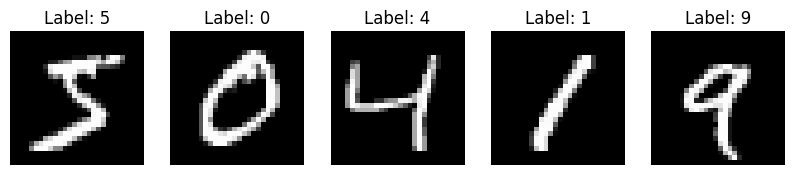

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,5, figsize=(10,2))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28,28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()


### Train/test split & scaling

We split the data into a training set (the model learns here) and a test set (we evaluate on unseen examples). Then we scale pixel values to [0,1] so all features are on a comparable range.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

scaler = MinMaxScaler()              # scale each pixel to [0, 1]
X_train = scaler.fit_transform(X_train_raw)
X_test  = scaler.transform(X_test_raw)

print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (60000, 784)  Test: (10000, 784)


### First classifier (single MLP)
We train a Multi-Layer Perceptron (MLP)—a simple neural network with one hidden layer—to classify digits 0–9. You’ll see training and test accuracy to gauge learning vs. generalization. We also compute a confusion matrix to inspect which digits it confuses the most.

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

mlp_single = MLPClassifier(
    hidden_layer_sizes=(32,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42
)
mlp_single.fit(X_train, y_train)

print("Single-MLP Train Acc:", mlp_single.score(X_train, y_train))
print("Single-MLP Test Acc :", mlp_single.score(X_test, y_test))

cm_single = confusion_matrix(y_test, mlp_single.predict(X_test))
print("Confusion matrix (single MLP):\n", cm_single)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Single-MLP Train Acc: 0.9883333333333333
Single-MLP Test Acc : 0.9646
Confusion matrix (single MLP):
 [[ 975    1    1    0    2    2    1    0    2    2]
 [   0 1102    5    2    1    3    3    2    7    0]
 [   4    4  964    6    3    1    2    6    6    3]
 [   2    1    9  973    0   12    0    7   12    4]
 [   1    0    5    1  924    2    4    1    1   36]
 [   3    0    0   15    1  856    5    3   10    9]
 [   7    0    3    0    2    3  961    0    6    0]
 [   2    3    6    3    3    2    0 1001    5   17]
 [   9    5    3   11    1    8    6    4  921    7]
 [   1    5    0    5    5    1    0    6    2  969]]


### Reading the confusion matrix

The heatmap shows true classes on rows and predicted classes on columns. Bright diagonal cells mean correct predictions; off-diagonal cells show specific confusions (e.g., 4s mistaken for 9s). This is more informative than accuracy alone.

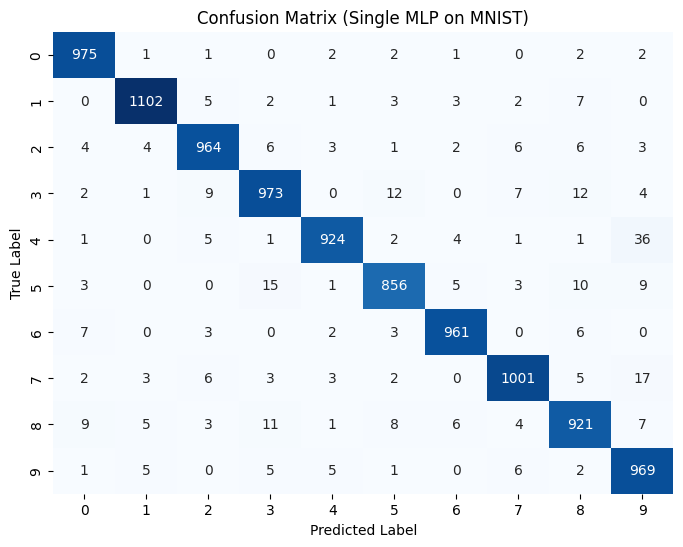

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_single, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Single MLP on MNIST)")
plt.show()


### One-Vs-Rest (OvR) setup

Instead of one network handling all classes at once, OvR trains one binary classifier per class (e.g., “is it a 0?” vs. “not 0”), then picks the most confident. We’ll compare its performance and confusion matrix to the single MLP.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

base_mlp = MLPClassifier(
    hidden_layer_sizes=(32,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42
)

ovr = OneVsRestClassifier(base_mlp)
ovr.fit(X_train, y_train)

print("OvR Train Acc:", ovr.score(X_train, y_train))
print("OvR Test Acc :", ovr.score(X_test, y_test))

cm_ovr = confusion_matrix(y_test, ovr.predict(X_test))
print("Confusion matrix (OvR MLPs):\n", cm_ovr)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

OvR Train Acc: 0.99975
OvR Test Acc : 0.9812
Confusion matrix (OvR MLPs):
 [[ 975    1    0    1    1    0    2    2    1    3]
 [   0 1115    3    0    1    1    0    1    4    0]
 [   0    3  984    2    2    0    0    3    3    2]
 [   2    1    3  997    0    7    0    7    3    0]
 [   1    0    2    0  950    0    3    2    0   17]
 [   3    0    0    5    3  885    4    0    1    1]
 [   3    1    0    0    2    2  974    0    0    0]
 [   2    3    5    1    3    0    0 1015    2   11]
 [   2    3    3    3    2    2    3    2  951    4]
 [   1    4    0    6    4    6    0    4    3  966]]


### Dimensionality reduction (PCA) as representation

When we work with images like MNIST, each digit has 784 pixel values (28×28). That’s a lot of numbers, and many of them are very similar across images. For example, almost all digits have dark pixels around the center, and lighter pixels in the corners.

Principal Component Analysis (PCA) is a way to summarize these patterns. Instead of looking at every single pixel, PCA finds a smaller set of common building blocks that often appear in the images. Each digit can then be described as a mix of these building blocks, rather than all 784 raw pixels.

The plots of “PC 1, PC 2, …” show some of these building blocks. They aren’t digits themselves, but patterns like strokes, edges, or loops that, when combined, can help represent many different digits.

This connects to the idea of representation learning from Lecture 2: instead of working directly with the raw inputs, we learn a new representation that captures the most important structure in the data.

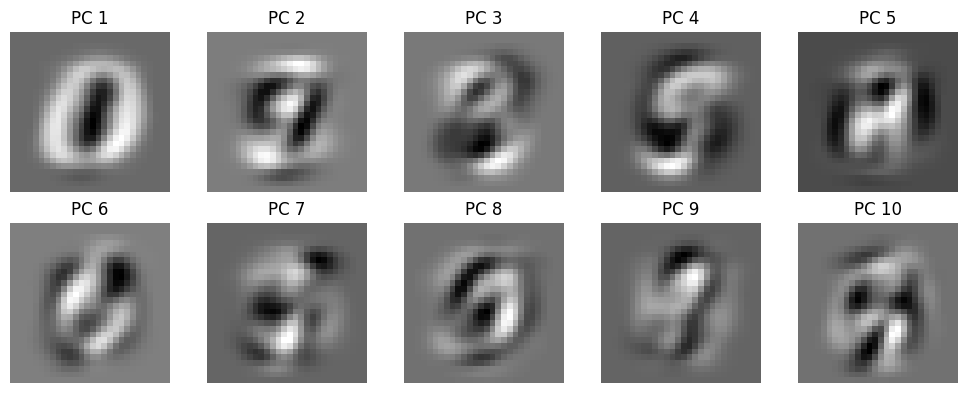

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, whiten=True, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

fig, axes = plt.subplots(2,5, figsize=(10,4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca.components_[i].reshape(28,28), cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()


### Train on PCA features

Now we train the same MLP using the 50-D PCA representation instead of raw pixels. This tests whether a compact learned representation can keep accuracy competitive while using fewer features.

In [8]:
mlp_pca = MLPClassifier(
    hidden_layer_sizes=(32,),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42
)
mlp_pca.fit(X_train_pca, y_train)

print("PCA+MLP Train Acc:", mlp_pca.score(X_train_pca, y_train))
print("PCA+MLP Test Acc :", mlp_pca.score(X_test_pca, y_test))


PCA+MLP Train Acc: 0.9727333333333333
PCA+MLP Test Acc : 0.9634


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


### Compare approaches

Finally, we summarize test accuracy for the three setups—single MLP, OvR, and PCA+MLP—to see how architectural choices and representations affect performance. Small differences can matter; use these numbers to interpret strengths and weaknesses.

In [9]:
def evaluate_setups():
    print("Single MLP:", mlp_single.score(X_test, y_test))
    print("OvR MLP   :", ovr.score(X_test, y_test))
    print("PCA+MLP   :", mlp_pca.score(X_test_pca, y_test))

evaluate_setups()


Single MLP: 0.9646
OvR MLP   : 0.9812
PCA+MLP   : 0.9634
